In [5]:
!pip install pmdarima

In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [7]:
df = pd.read_csv("timeseries_ppi.csv")
print(df.describe())

                m3         ppi         cpi          gdp        m1nsa  \
count   169.000000  169.000000  169.000000   169.000000   169.000000   
mean   2731.284023   64.681539   58.769408  5305.793483   549.580061   
std    1957.463885   30.265955   32.979730  1996.606148   368.131833   
min     615.700010   25.240000   19.280001  2352.899900   138.429990   
25%    1036.200000   29.660000   25.639999  3588.300000   208.960010   
50%    2055.399900   77.000000   57.610001  4935.500000   415.329990   
75%    4204.899900   93.269997   89.690002  6720.899900   863.359990   
max    8148.600100  110.430000  116.750000  9482.099600  1182.140000   

            ddnsa        lppi       trend  
count  169.000000  168.000000  169.000000  
mean   242.584083   64.451071   85.000000  
std     88.164906   30.207334   48.930222  
min    109.470000   25.240000    1.000000  
25%    160.100010   29.617500   43.000000  
50%    240.410000   75.884998   85.000000  
75%    296.380000   93.210001  127.000000  

In [8]:
format_string = '%Y Q %q'
print(re.findall(r'%[a-zA-Z]', format_string))

['%Y', '%q']


In [9]:
period =12

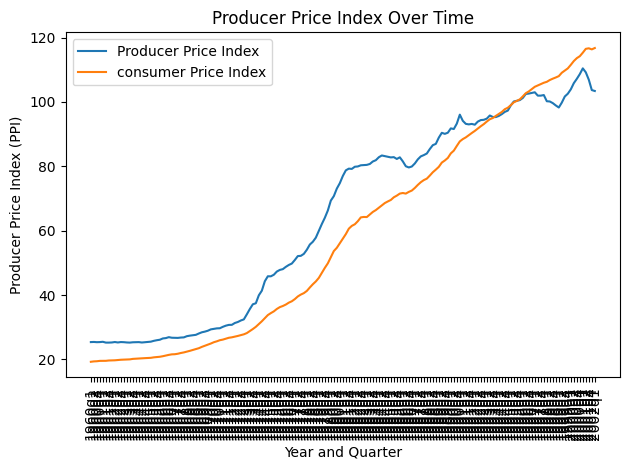

correlation between ppi and cpi 0.9788745316062621


In [10]:
plt.plot(df['yearqrt'], df['ppi'], label='Producer Price Index')
plt.plot(df['yearqrt'], df['cpi'], label='consumer Price Index')
plt.xlabel('Year and Quarter')
plt.ylabel('Producer Price Index (PPI)')
plt.title('Producer Price Index Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print('correlation between ppi and cpi',df['ppi'].corr(df['cpi']))

### log

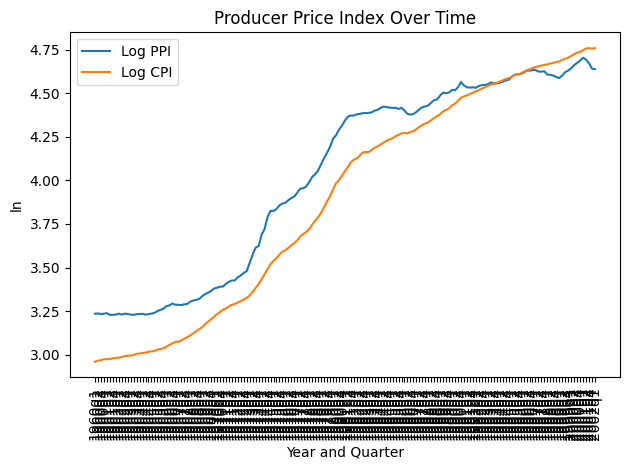

In [11]:
plt.plot(df['yearqrt'], np.log(df['ppi']), label='Log PPI')
plt.plot(df['yearqrt'], np.log(df['cpi']), label='Log CPI')

plt.xlabel('Year and Quarter')
plt.ylabel('ln')
plt.title('Producer Price Index Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### differencing

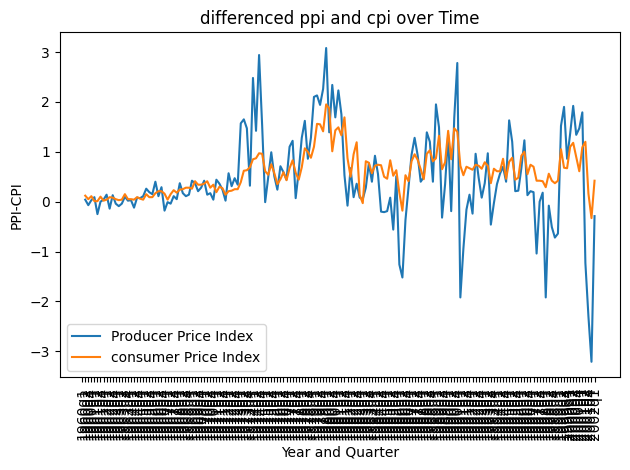

In [12]:
plt.plot(df['yearqrt'], df['ppi'].diff(), label='Producer Price Index')
plt.plot(df['yearqrt'], df['cpi'].diff(), label='consumer Price Index')
plt.xlabel('Year and Quarter')
plt.ylabel('PPI-CPI')
plt.title('differenced ppi and cpi over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### GDP

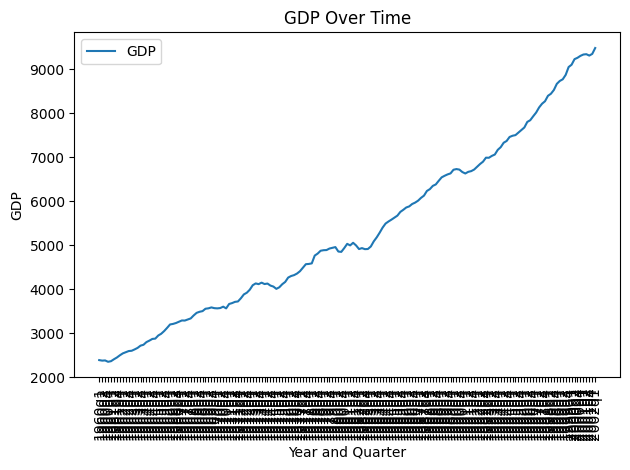

In [13]:
plt.plot(df['yearqrt'], df['gdp'], label='GDP')
plt.xlabel('Year and Quarter')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### differencing

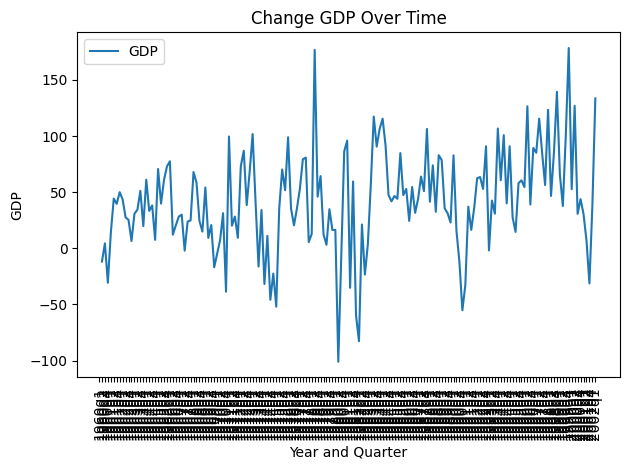

In [14]:
plt.plot(df['yearqrt'], df['gdp'].diff(), label='GDP')
plt.xlabel('Year and Quarter')
plt.ylabel('GDP')
plt.title('Change GDP Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### first log then differencing

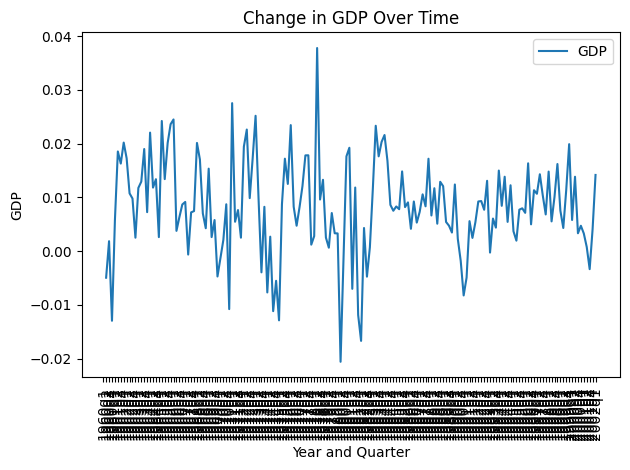

In [15]:
plt.plot(df['yearqrt'], np.log(df['gdp']).diff(), label='GDP')
plt.xlabel('Year and Quarter')
plt.ylabel('GDP')
plt.title('Change in GDP Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
print("PPI")
test  = adfuller(df["ppi"])
print(test)
df["dppi"] = df["ppi"].diff()
df["dppi"] = df["dppi"].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["dppi"])
test  = adfuller(df["dppi"])
print(test)

print("CPI")
test  = adfuller(df["cpi"])
print(test)
df["dcpi"] = df["cpi"].diff().diff()
df["dcpi"] = df["dcpi"].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["dcpi"])
test  = adfuller(df["dcpi"])
print(test)

print("GDP")
test  = adfuller(df["gdp"])
print(test)
df["dgdp"] = df["gdp"].diff()
df["dppi"] = df["dppi"].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["dgdp"])
test  = adfuller(df["dgdp"])
print(test)


PPI
(-0.7745617756769603, 0.8264804014424039, 8, 160, {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 366.9391477706197)
(-4.047742679065597, 0.0011801482847234588, 7, 160, {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 364.65733731136015)
CPI
(-0.08059745892358096, 0.9513371365661683, 3, 164, {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}, 17.369584008008758)
(-17.501649815180805, 4.3822126278715424e-30, 1, 164, {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}, 21.562780854015216)
GDP
(2.1246509650982466, 0.9988145561652978, 2, 163, {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}, 1565.6879027991)
(-6.01264409389687, 1.5602001010851104e-07, 1, 163, {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}, 1558.6914980598663)


<ipython-input-16-8fee51224b72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dcpi"] = df["cpi"].diff().diff()
<ipython-input-16-8fee51224b72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dcpi"] = df["dcpi"].replace([np.inf, -np.inf], np.nan)


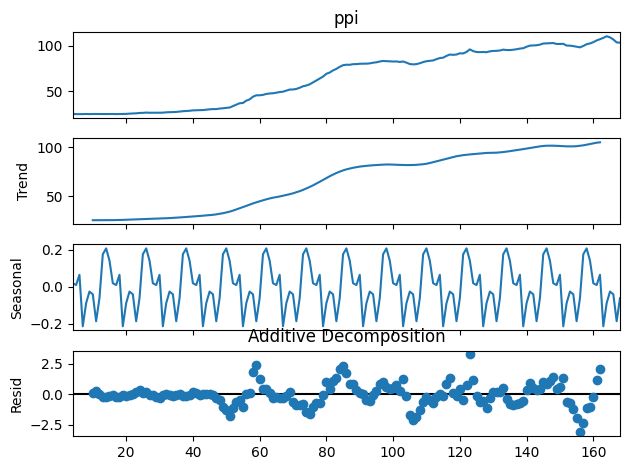

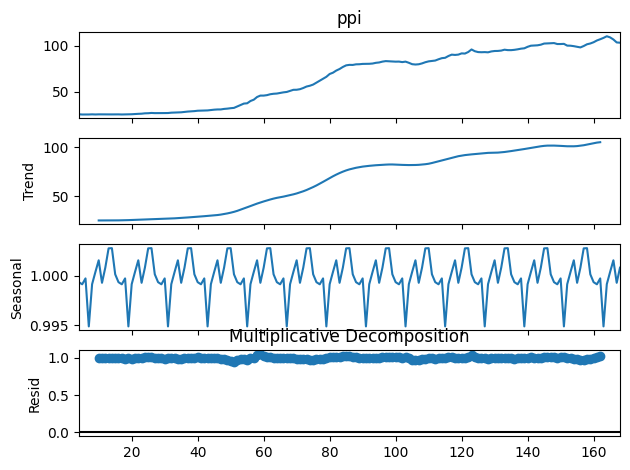

In [17]:
decomposition = seasonal_decompose(df['ppi'], model='additive', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Additive Decomposition')
plt.show()
decomposition = seasonal_decompose(df['ppi'], model='multiplicative', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Multiplicative Decomposition')
plt.show()

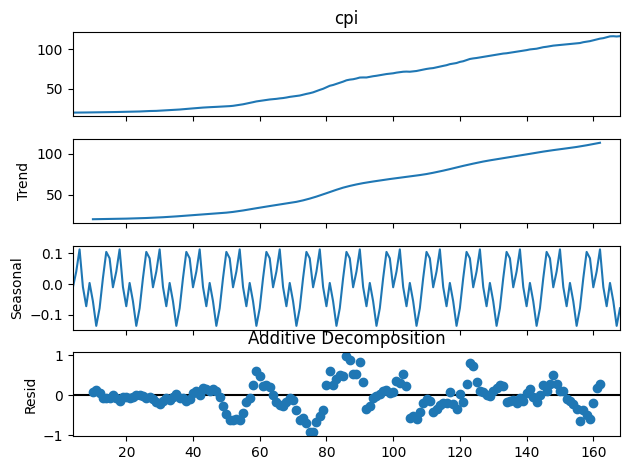

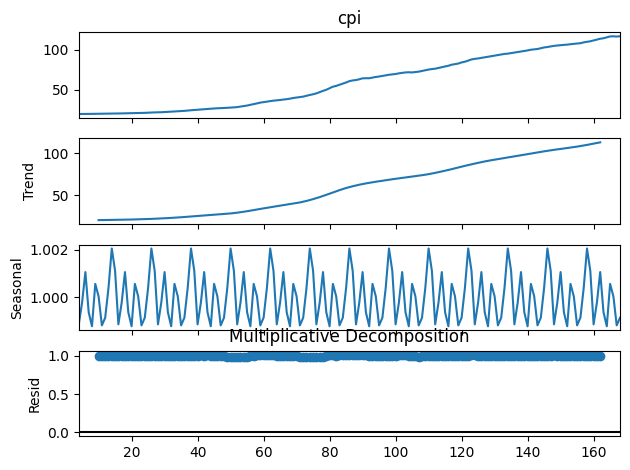

In [18]:
decomposition = seasonal_decompose(df['cpi'], model='additive', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Additive Decomposition')
plt.show()
decomposition = seasonal_decompose(df['cpi'], model='multiplicative', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Multiplicative Decomposition')
plt.show()

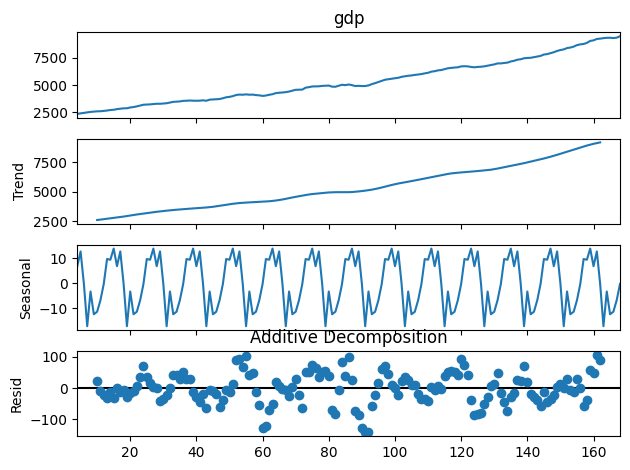

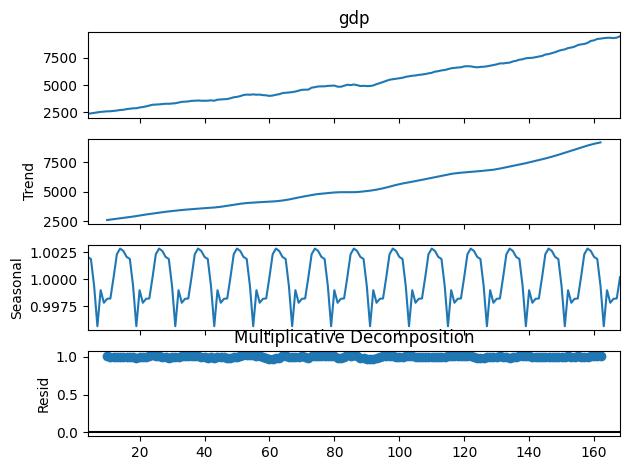

In [19]:
decomposition = seasonal_decompose(df['gdp'], model='additive', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Additive Decomposition')
plt.show()
decomposition = seasonal_decompose(df['gdp'], model='multiplicative', period=period)        # Specify the appropriate period
decomposition.plot()
plt.title('Multiplicative Decomposition')
plt.show()

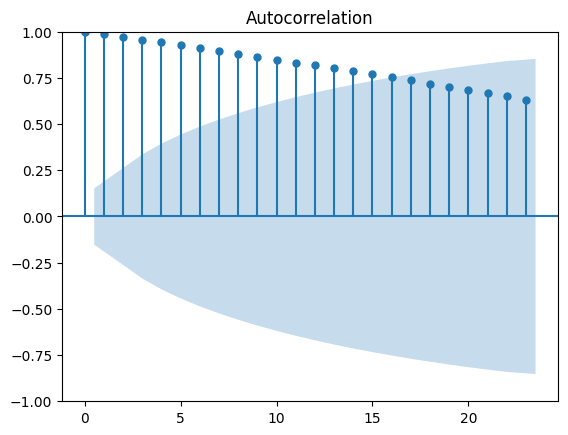

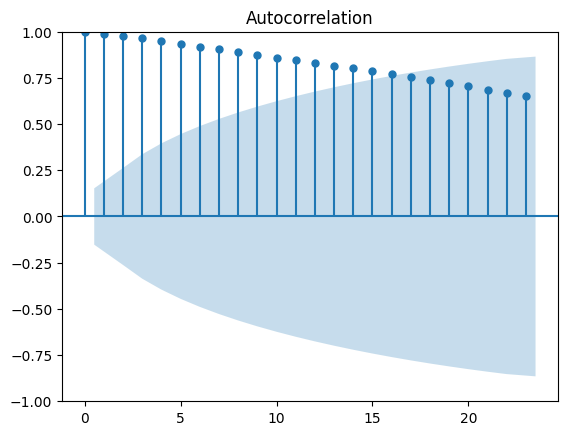

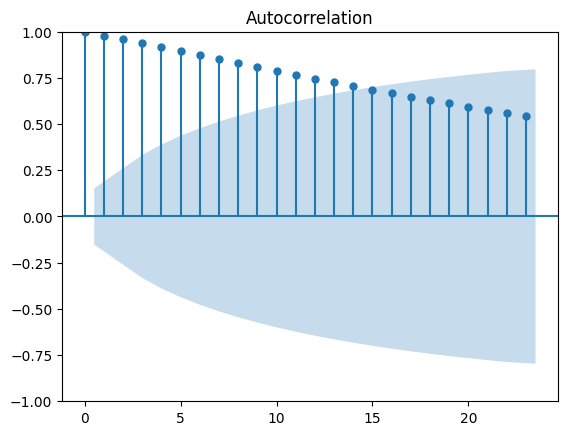

In [20]:
plot_acf(df["cpi"])
plot_acf(df["ppi"])
plot_acf(df["gdp"])
plt.show()

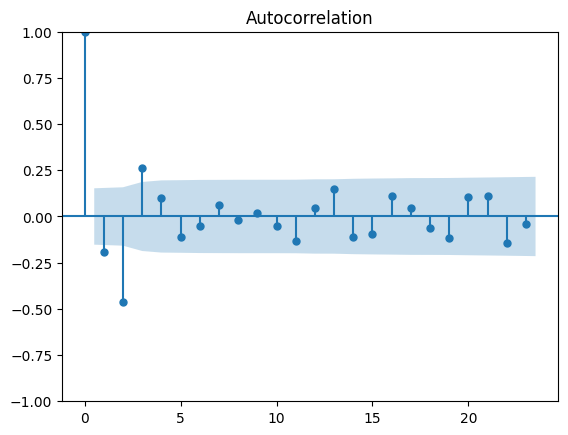

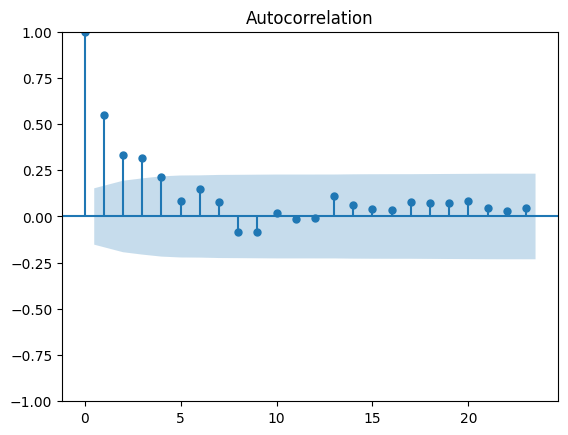

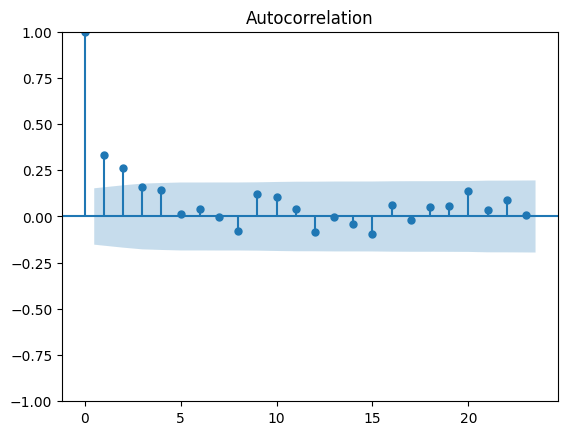

In [21]:
plot_acf(df["dcpi"])
plot_acf(df["dppi"])
plot_acf(df["dgdp"])
plt.show()

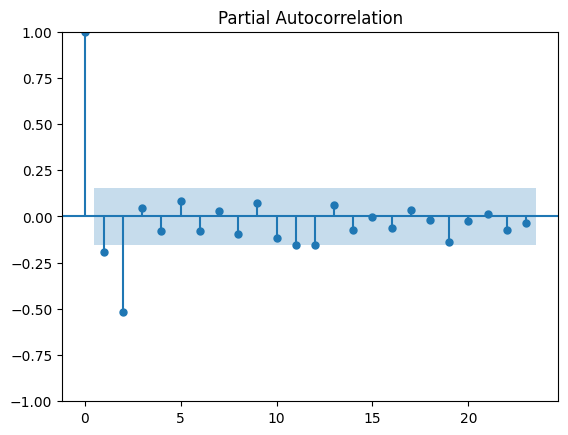

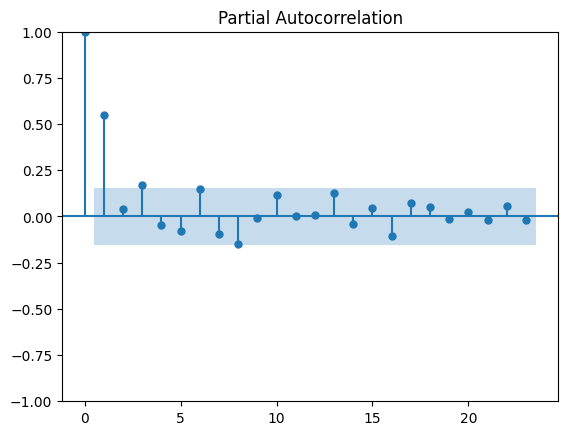

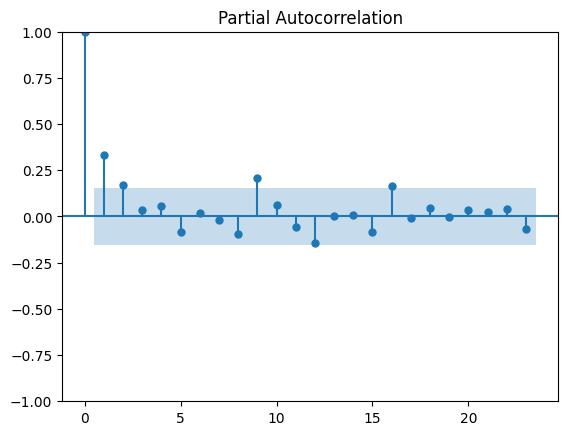

In [22]:
plot_pacf(df["dcpi"])
plot_pacf(df["dppi"])
plot_pacf(df["dgdp"])
plt.show()

In [23]:
# isko report mien kahi show na karna aur
# delete bhi krr dena iss cell ko
# as yeh inbuilt function use krr raha hai
# which is not recommended.

from pmdarima import auto_arima
arima_model = auto_arima(df['cpi'], seasonal=True, m=period)
print(arima_model.summary())

arima_model = auto_arima(df['ppi'], seasonal=True, m=period)
print(arima_model.summary())

arima_model = auto_arima(df['gdp'], seasonal=True, m=period)
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  165
Model:               SARIMAX(0, 2, 3)   Log Likelihood                  -0.702
Date:                Fri, 10 May 2024   AIC                              9.404
Time:                        14:22:40   BIC                             21.779
Sample:                             0   HQIC                            14.428
                                - 165                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2307      0.064     -3.629      0.000      -0.355      -0.106
ma.L2         -0.4860      0.062     -7.817      0.000      -0.608      -0.364
ma.L3          0.3872      0.065      5.973      0.0